The Problem Statement of this project is to build a model to classify Images. The dataset consists of a balanced no. of pictures of the sun during sunrise, noon and sunset times - Approx 100 images from each category. The model built should be able to classify images into these categories as accurately as possible.

# Data Wrangling

We downloaded all the images from Google images using the "Download All Images" extension and saved them under different 
folders.
Then we download all necessary Python libraries and checking features of the Images.

In [1]:
from __future__ import with_statement
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
import os, PIL
import matplotlib.image as mpimg
from PIL import Image
import pandas as pd
import seaborn as sns

In [4]:
image = plt.imread('Sunrise Images/0_Jon-Bower.jpg')

In [5]:
type(image)

numpy.ndarray

In [6]:
# Obtain Red, Green, Blue values for the image
red = image[:,:,0]
green = image[:,:,1]
blue = image[:,:,2]

In [7]:
# Accessing Height, Width and Color representation of the Image
image.shape

(409, 615, 3)

In [8]:
#No. of pixels
image.size

754605

# Exploratory Data Analysis

Taking a sample image from set of Sunrise Images, we try to draw the RGB Histogram for the image.

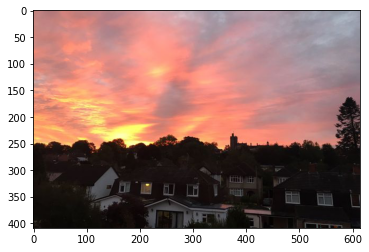

In [9]:
plt.imshow(image)

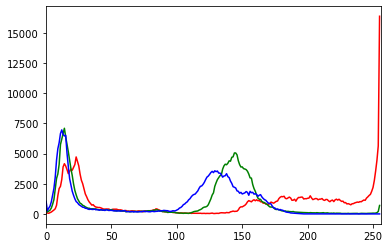

In [10]:
color = ('r','g','b')
for i,col in enumerate(color):
    hist = cv2.calcHist([image],[i],None,[256],[0,256])
    plt.plot(hist, color=col)
    plt.xlim([0,256])
plt.show()

Next step would be to create a Mean Image from set of all Sunrise Images and plot a histogram.
Because all images are of different dimension, it would be helpful to resize them to one size.

In [9]:
# Average Image and Histogram for Sunrise Images

In [11]:
#List all files in the Directory
allfiles=os.listdir("Sunrise Images/")

In [12]:
#Apply a filter for listing all jpg, png and jpeg files
imlist=[filename for filename in allfiles if  filename[-4:] in [".jpg",".png"] or filename[-5:] in [".jpeg"]]

In [13]:
imlist[0]

'0_Jon-Bower.jpg'

In [ ]:
os.mkdir("Resized Sunrise Images")

In [14]:
dim = (300, 300)
for im in imlist:
    image = Image.open("Sunrise Images/"+im)
    image = image.resize(dim)
    image.save("Resized Sunrise Images/"+im)

Next step would be to read each of the resized images and extract pixel values.

In [15]:
with open('resized-sunrise pixels.csv', 'w+') as file:
  file.write('R,G,B\n')
  for im in imlist:
    img = Image.open("Resized Sunrise Images/"+im)
    pix = img.load()
    width, height = img.size
    for x in range(width):
      for y in range(height):
        r = pix[x,y][0]
        g = pix[x,x][1]
        b = pix[x,x][2]
      file.write('{0},{1},{2}\n'.format(r,g,b))

In [14]:
df1 = pd.read_csv("resized-sunrise pixels.csv")

In [15]:
df1.head()

,R,G,B
0,19,128,127
1,16,129,128
2,19,131,130
3,20,132,131
4,17,133,132


In [ ]:
color = ('r','g','b')
plt.plot(df1, color=color)

(0.0, 0.014)

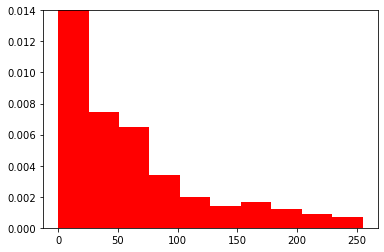

In [23]:
plt.hist(df1['R'], color='Red', density=True)
plt.ylim([0,0.014])

(0.0, 0.014)

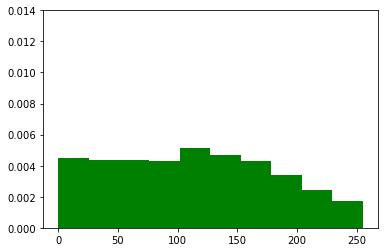

In [24]:
plt.hist(df1['G'], color='Green', density=True)
plt.ylim([0,0.014])

(0.0, 0.014)

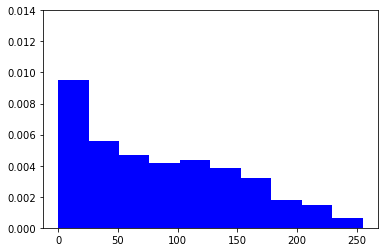

In [26]:
plt.hist(df1['B'], color='Blue', density=True)
plt.ylim([0,0.014])

Let's repeat the steps for Noon Images and Sunset Images.

In [22]:
# Average Image and Histogram for Noon Sun Images

In [23]:
#List all files in the Directory
allfiles=os.listdir("Noon Sun Images/")

In [24]:
#Apply a filter for listing all jpg, png and jpeg files
imlist=[filename for filename in allfiles if  filename[-4:] in [".jpg",".png"] or filename[-5:] in [".jpeg"]]

In [25]:
imlist[0]

'1.jpg'

In [26]:
os.mkdir('Resized Noon Sun Images')

In [27]:
dim = (300, 300)
for im in imlist:
    image = Image.open("Noon Sun Images/"+im)
    image = image.resize(dim)
    image.save("Resized Noon Sun Images/"+im)

In [28]:
with open('resized-noonsun pixels.csv', 'w+') as file:
  file.write('R,G,B\n')
  for im in imlist:
    img = Image.open("Resized Noon Sun Images/"+im)
    pix = img.load()
    width, height = img.size
    for x in range(width):
      for y in range(height):
        r = pix[x,y][0]
        g = pix[x,x][1]
        b = pix[x,x][2]
      file.write('{0},{1},{2}\n'.format(r,g,b))

In [29]:
df2 = pd.read_csv("resized-noonsun pixels.csv")

In [30]:
df2.head()

,R,G,B
0,39,111,144
1,39,112,145
2,40,113,146
3,41,115,148
4,41,117,150


(0.0, 0.014)

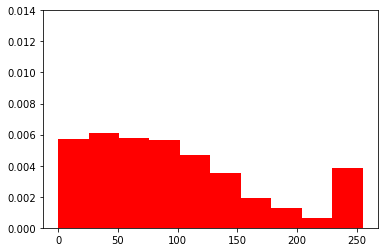

In [31]:
plt.hist(df2['R'], color='Red', density=True)
plt.ylim([0,0.014])

(0.0, 0.014)

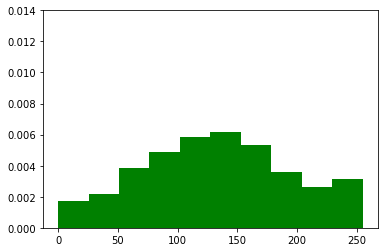

In [32]:
plt.hist(df2['G'], color='Green', density=True)
plt.ylim([0,0.014])

(0.0, 0.014)

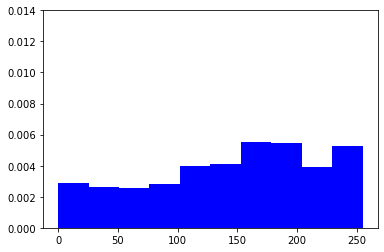

In [33]:
plt.hist(df2['B'], color='Blue', density=True)
plt.ylim([0,0.014])

In [34]:
# Average Image and Histogram for Sunset Images

In [35]:
#List all files in the Directory
allfiles=os.listdir("Sunset Images/")

In [36]:
#Apply a filter for listing all jpg, png and jpeg files
imlist=[filename for filename in allfiles if  filename[-4:] in [".jpg",".png"] or filename[-5:] in [".jpeg"]]

In [37]:
imlist[0]

'1-N9itIZGxd2FvtbbDnlQIg.jpeg'

In [38]:
os.mkdir('Resized Sunset Images')

In [39]:
dim = (300, 300)
for im in imlist:
    image = Image.open("Sunset Images/"+im)
    image = image.resize(dim)
    image.save("Resized Sunset Images/"+im)

In [ ]:
with open('resized-sunset pixels.csv', 'w+') as file:
  file.write('R,G,B\n')
  for im in imlist:
    img = Image.open("Resized Sunset Images/"+im)
    pix = img.load()
    width, height = img.size
    for x in range(width):
      for y in range(height):
        r = pix[x,y][0]
        g = pix[x,x][1]
        b = pix[x,x][2]
      file.write('{0},{1},{2}\n'.format(r,g,b))

In [34]:
df3 = pd.read_csv("resized-sunset pixels.csv")

In [35]:
df3.head()

,R,G,B
0,1,52,81
1,1,54,81
2,1,58,81
3,1,64,81
4,1,69,82


(0.0, 0.014)

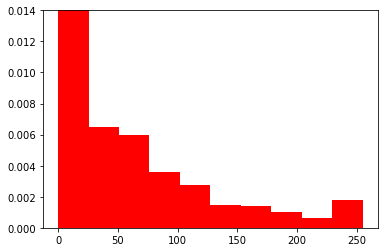

In [39]:
plt.hist(df3['R'], color='Red', density=True)
plt.ylim([0,0.014])

(0.0, 0.014)

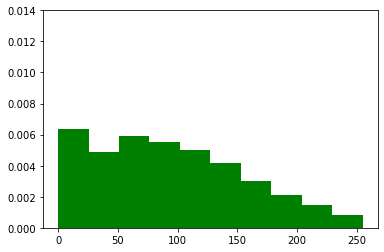

In [40]:
plt.hist(df3['G'], color='Green', density=True)
plt.ylim([0,0.014])

(0.0, 0.014)

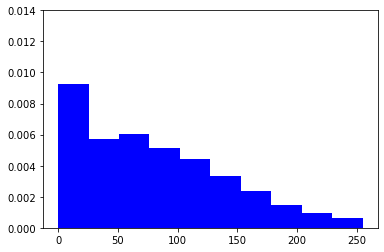

In [41]:
plt.hist(df3['B'], color='Blue', density=True)
plt.ylim([0,0.014])